Importamos las bibliotecas que utilizaremos 

In [296]:
import plotly as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px

Análisis de la primera tabla del índice de felicidad mundial

In [297]:
datos_ranking_por_paises = "Data1.xls" # Cargamos los datos
ranking_por_paises = pd.read_excel(datos_ranking_por_paises)

In [298]:
ranking_por_paises_1 = ranking_por_paises.drop(columns=[ 'Standard error of ladder score',
       'upperwhisker', 'lowerwhisker', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'])

In [299]:
columnas_mundial = ["Country name", "Ladder score"] # Filtramos por las columnas que utilizaremos 
ranking = list(range(1,138)) # Agregamos una columna que representa el ranking que ocupa cada pais
ranking_mundial = ranking_por_paises[columnas_mundial].copy()
ranking_mundial['Ranking'] = ranking
ranking_mundial["Country name"] = ranking_mundial["Ranking"].astype(str) + ". " + ranking_mundial["Country name"]
ranking_mundial = ranking_mundial.sort_values(by="Ladder score", ascending=True)
# Ordenamos los paises por orden de Life Ladder("Que representa el índice de felicidad")
#ranking_mundial

In [300]:
primeros_5 = ranking_mundial.iloc[:3]
ultimos_5 = ranking_mundial.iloc[-3:]
medio = ranking_mundial.iloc[104:107]
total= pd.concat([primeros_5,medio,ultimos_5], ignore_index=True)
#total


In [301]:
import plotly.express as px

fig = px.bar(total, x='Ladder score', y='Country name', color='Ladder score',
             labels={'Ladder score': 'Índice de felicidad', 'Country name': 'Ranking'},
             orientation='h', 
             title='Ranking de Felicidad',
             color_continuous_scale='pinkyl')  

fig.update_layout(yaxis_title='')
fig.update_layout(xaxis_title=' Años: 2020 - 2021 - 2022')
fig.update_layout(title_x=0.5)
fig.update_layout(title_font=dict(size=26))
fig.show()


In [302]:
#fig.write_image("grafico_ranking_felicidad.png")

Análisis de la segunda tabla del índice de felicidad mundial

In [303]:
indice_felicidad_mundial = "Data2.xls"
datos_felicidad_mundial = pd.read_excel(indice_felicidad_mundial) # 2008-2022 137 paises
#datos_felicidad_mundial

In [304]:
datos_espania = datos_felicidad_mundial.loc[datos_felicidad_mundial['Country name'] == 'Spain']
ultimos_anios_espania = datos_espania[datos_espania['year'] >= 2010]
indices = range(1,len(ultimos_anios_espania)+1)
ultimos_anios_espania.index = indices
#ultimos_anios_espania.isnull() # Verificamos que no tiene valores nulos.
#ultimos_anios_espania

In [305]:
fig = px.bar(ultimos_anios_espania, x='year', y='Life Ladder', 
             title='Índice de felicidad en España',
             labels={'Life Ladder': 'Índice de Felicidad', 'year': 'Año'},
             height=500,  # Ajusta el tamaño del gráfico según sea necesario
             color='Life Ladder', 
             color_continuous_scale='Peach'  
            )
fig.update_layout(yaxis_title='')
fig.update_layout(xaxis_title='')
fig.update_layout(title_x=0.5)
fig.update_layout(title_font=dict(size=28))
fig.update_xaxes(tickvals=ultimos_anios_espania['year'], ticktext=ultimos_anios_espania['year'], tickfont=dict(size=16))
fig.show()


In [306]:
#fig.write_image("Indice_felicidad_españa.png")

In [307]:
ultimos_anios_espania_1 = ultimos_anios_espania.drop(columns="Country name", axis=1)

Análisis de los datos de felicidad según el sexo

In [308]:
felicidad_sexo = "felicidad_españa_ sexo.csv"
datos_felicidad_sexo = pd.read_csv(felicidad_sexo, sep = ";" , encoding='latin-1')
# Años 2013/2018/2022 Clasificación por sexo
columnas_sexo = ['Sexo', 'Frecuencia', 'Año', 'Total']
datos_felicidad_sexo.columns = columnas_sexo


In [309]:
# Reemplazar comas por puntos en la columna 'Total'
datos_felicidad_sexo['Total'] = datos_felicidad_sexo ['Total'].str.replace(',', '.')

# Convertir la columna 'Total' a tipo de datos numérico (float)
datos_felicidad_sexo['Total'] = datos_felicidad_sexo ['Total'].astype(float)

In [310]:
felicidad_total_sexo = nuevo_df = datos_felicidad_sexo[datos_felicidad_sexo['Sexo'] == 'Total'] #Pertene a ambos sexos 
felicidad_total_sexo_1=felicidad_total_sexo.drop(columns="Sexo", axis=1)
felicidad_total_sexo_2 = felicidad_total_sexo_1.sort_values(by='Total')
#felicidad_total_sexo_2.head(2)

In [311]:
# Filtrar las filas donde Sexo no sea 'Total'
df_sexo_frecuencia = datos_felicidad_sexo[datos_felicidad_sexo['Sexo'] != 'Total']
#df_sexo_frecuencia

In [312]:
hombres_df = df_sexo_frecuencia[df_sexo_frecuencia['Sexo'] == 'Hombres'].drop(columns='Sexo')
hombres_df = hombres_df.sort_values(by="Total")
mujeres_df = df_sexo_frecuencia[df_sexo_frecuencia['Sexo'] == 'Mujeres'].drop(columns='Sexo')
mujeres_df = mujeres_df.sort_values(by = "Total")

<Figure size 640x480 with 0 Axes>

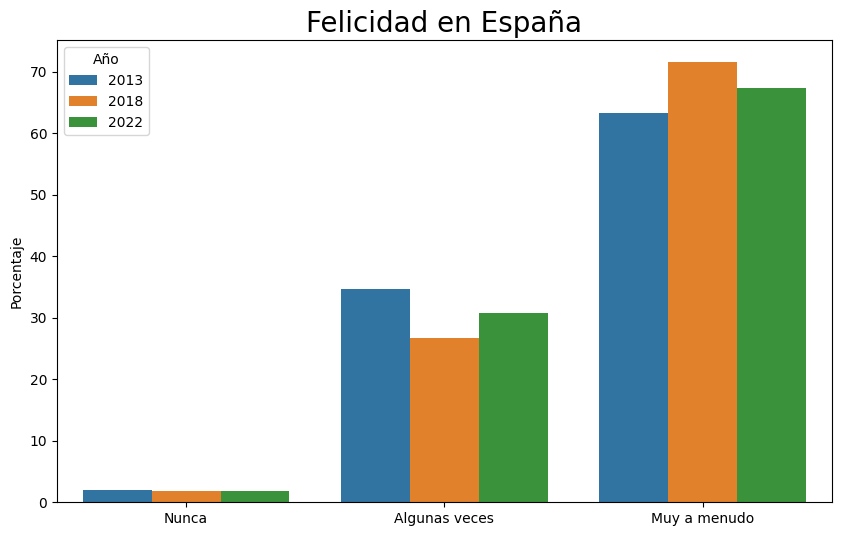

In [313]:

fig = plt.figure()
plt.figure(figsize=(10, 6))
sns.barplot(x='Frecuencia', y='Total', hue='Año', data=felicidad_total_sexo_2, palette='tab10')

plt.title('Felicidad en España', fontsize=20)

plt.ylabel('Porcentaje')
plt.xlabel("")

plt.savefig('felicidad_espana.png', dpi=300)
plt.show();


In [314]:
mujeres_felices = mujeres_df.loc[mujeres_df['Frecuencia'] == 'Muy a menudo']
hombres_felices = hombres_df.loc[hombres_df['Frecuencia'] == 'Muy a menudo']

In [315]:
datos_totales_sexo = pd.merge(mujeres_felices, hombres_felices, on='Año', suffixes=('_Mujeres', '_Hombres'))
datos_totales_sexo = datos_totales_sexo.drop(['Frecuencia_Mujeres' , 'Frecuencia_Hombres'], axis=1)
datos_totales_sexo= datos_totales_sexo.rename(columns={'periodo': "Año"})
orden = ["Año", "Total_Mujeres" , "Total_Hombres"]
datos_totales_sexo = datos_totales_sexo[orden]

In [316]:
data_total_2022 = datos_totales_sexo.iloc[0:1].drop(columns=["Año"])
data_total_2018 = datos_totales_sexo.iloc[1:2].drop(columns=["Año"])
data_total_2013 = datos_totales_sexo.iloc[2:3].drop(columns=["Año"])
data_total_2013 = data_total_2013.T.reset_index()
columnas= ["Sexo", "Total"]
data_total_2013.columns = columnas
data_total_2018 = data_total_2018.T.reset_index()
data_total_2018.columns = columnas
data_total_2022 = data_total_2022.T.reset_index()
data_total_2022.columns = columnas
data_total_2013.rename(columns={'Total': '2013'}, inplace=True)
data_total_2018.rename(columns={'Total': '2018'}, inplace=True)
data_total_2022.rename(columns={'Total': '2022'}, inplace=True)


In [317]:
data_felicidad = pd.merge(data_total_2013, data_total_2018, on='Sexo').merge(data_total_2022, on='Sexo')
data_felicidad
data_felicidad['Sexo'] = data_felicidad['Sexo'].str.replace('Total_', '')
data_felicidad
data_felicidad = data_felicidad.loc[[1, 0]]
#data_felicidad

In [318]:
fig = px.bar(data_felicidad.melt(id_vars='Sexo', var_name='Año', value_name='Felicidad'),
             x='Año', y='Felicidad', color='Sexo',
             labels={'Felicidad': ' ', 'Año': ''},
             title='Porcentaje de felicidad en España',
             height=500,
             barmode='group',  
             color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(title_text='Porcentaje de felicidad en España', title_x=0.5, title_font=dict(size=30))
fig.update_yaxes(range=[0, 90])
fig.show()


In [319]:
#fig.write_image("felicidad_sexo.png")

In [320]:
data_felicidad_sexo=data_felicidad.melt(id_vars='Sexo', var_name='Año', value_name='Porcentaje de felicidad')

Análisis de los datos de felicidad por edad

In [321]:
felicidad_es_edad = "felicidad_espania_edades.csv"
datos_felicidad_es_edad = pd.read_csv(felicidad_es_edad, sep = ";" , encoding='latin-1')
# Años 2013/2018/2022 Clasificación por edad
# Reemplazar comas por puntos en la columna 'Total'
datos_felicidad_es_edad['Total'] = datos_felicidad_es_edad ['Total'].str.replace(',', '.')

# Convertir la columna 'Total' a tipo de datos numérico (float)
datos_felicidad_es_edad['Total'] = datos_felicidad_es_edad ['Total'].astype(float)
#datos_felicidad_es_edad

In [322]:
# Para agruparlos primero nos quedamos unicamente con el periodo 2013

df_2013_edad = datos_felicidad_es_edad[datos_felicidad_es_edad['periodo'] == 2013]

# Ahora vamos a crear 3 nuevos Df diviendo las edades en 3 grandes grupos 

edad_grupo_a = [ "De 16 a 24 años", "De 25 a 34 años", "De 35 a 49 años"]
grupo_a = df_2013_edad[df_2013_edad["Edad"].isin(edad_grupo_a)]
edad_grupo_b = [ 'De 50 a 64 años']
grupo_b = df_2013_edad[df_2013_edad['Edad'].isin(edad_grupo_b)]
edad_grupo_c = ['De 65 y más años']
grupo_c = df_2013_edad[df_2013_edad['Edad'].isin(edad_grupo_c)]

# Dividimos cada grupo por la frecuencia = NUNCA (Solo lo hacemos en el de edad 16 a 49 años 
# ya que al estar formado por 3 subgrupos calculamos la media de los tres")
grupo_frecuencia_1 = grupo_a[grupo_a["Frecuencia"]== "Nunca"]
media_nunca = grupo_frecuencia_1["Total"].mean()
datos1= {"Edad": "De 16 a 49 años",
        "Frecuencia": "Nunca",
        "Total": media_nunca}
df_2013_nunca= pd.DataFrame([datos1])

# Dividimos cada grupo por la frecuencia = MUY AMENUDO
grupo_frecuencia_2 = grupo_a[grupo_a["Frecuencia"]== "Muy a menudo"]
media_menudo = grupo_frecuencia_2["Total"].mean()
datos2= {"Edad": "De 16 a 49 años",
        "Frecuencia": "Muy a menudo",
        "Total": media_menudo}
df_2013_menudo= pd.DataFrame([datos2])

# Dividimos cada grupo por la frecuencia = ALGUNAS VECES 

grupo_frecuencia_3 = grupo_a[grupo_a["Frecuencia"]== "Algunas veces"]
media_algunas = grupo_frecuencia_3["Total"].mean()    
datos3= {"Edad": "De 16 a 49 años",
        "Frecuencia": "Algunas veces",
        "Total": media_algunas}
df_2013_algunas= pd.DataFrame([datos3])

df_2013_grupo_a   = pd.concat([df_2013_nunca,df_2013_algunas,df_2013_menudo], ignore_index=True)
df_2013_grupo_a                      
df_2013 = pd.concat([df_2013_grupo_a, grupo_b,grupo_c], ignore_index=True)
df_2013 = df_2013.drop(columns="periodo")
df_2013_ordenado = df_2013.sort_values(by='Frecuencia') 
df_2013_ordenado
# Nos quedaremos unicamente con la frecuencia "Muy a menudo" que representa nuestra con índice mas alto de felicidad
df_felicidad_2013 = df_2013_ordenado[df_2013_ordenado["Frecuencia"]=="Muy a menudo"]
df_felicidad_2013 = df_felicidad_2013.drop(columns=["Frecuencia"])
#df_felicidad_2013

In [323]:
# Para agruparlos primero nos quedamos unicamente con el periodo 2018

df_2018_edad = datos_felicidad_es_edad[datos_felicidad_es_edad['periodo'] == 2018]

# Ahora vamos a crear 3 nuevos Df diviendo las edades en 3 grandes grupos 

edad_grupo_a_1 = [ "De 16 a 24 años", "De 25 a 34 años", "De 35 a 49 años"]
grupo_a_1 = df_2018_edad[df_2018_edad["Edad"].isin(edad_grupo_a_1)]
edad_grupo_b_1 = [ 'De 50 a 64 años']
grupo_b_1 = df_2018_edad[df_2018_edad['Edad'].isin(edad_grupo_b_1)]
edad_grupo_c_1 = ['De 65 y más años']
grupo_c_1 = df_2018_edad[df_2018_edad['Edad'].isin(edad_grupo_c_1)]

# Dividimos cada grupo por la frecuencia = NUNCA (Solo lo hacemos en el de edad 16 a 49 años 
# ya que al estar formado por 3 subgrupos calculamos la media de los tres")
grupo_frecuencia_4 = grupo_a_1[grupo_a_1["Frecuencia"]== "Nunca"]
media_nunca_1 = grupo_frecuencia_4["Total"].mean()
datos1_1= {"Edad": "De 16 a 49 años",
        "Frecuencia": "Nunca",
        "Total": media_nunca_1}
df_2018_nunca= pd.DataFrame([datos1_1])

# Dividimos cada grupo por la frecuencia = MUY AMENUDO
grupo_frecuencia_5 = grupo_a_1[grupo_a_1["Frecuencia"]== "Muy a menudo"]
media_menudo_1 = grupo_frecuencia_5["Total"].mean()
datos2_1= {"Edad": "De 16 a 49 años",
        "Frecuencia": "Muy a menudo",
        "Total": media_menudo_1}
df_2018_menudo= pd.DataFrame([datos2_1])

# Dividimos cada grupo por la frecuencia = ALGUNAS VECES 

grupo_frecuencia_6 = grupo_a_1[grupo_a_1["Frecuencia"]== "Algunas veces"]
media_algunas_1 = grupo_frecuencia_6["Total"].mean()    
datos3_1= {"Edad": "De 16 a 49 años",
        "Frecuencia": "Algunas veces",
        "Total": media_algunas_1}
df_2018_algunas= pd.DataFrame([datos3_1])

df_2018_grupo_a   = pd.concat([df_2018_nunca,df_2018_algunas,df_2018_menudo], ignore_index=True)
df_2018_grupo_a                      
df_2018 = pd.concat([df_2018_grupo_a, grupo_b_1,grupo_c_1], ignore_index=True)
df_2018 = df_2018.drop(columns="periodo")
df_2018_ordenado = df_2018.sort_values(by='Frecuencia') 
df_2018_ordenado
# Nos quedaremos unicamente con la frecuencia "Muy a menudo" que representa nuestra con índice mas alto de felicidad
df_felicidad_2018 = df_2018_ordenado[df_2018_ordenado["Frecuencia"]=="Muy a menudo"]
df_felicidad_2018 = df_felicidad_2018.drop(columns=["Frecuencia"])
#df_felicidad_2018

In [324]:
# Para agruparlos primero nos quedamos unicamente con el periodo 2022

df_2022_edad = datos_felicidad_es_edad[datos_felicidad_es_edad['periodo'] == 2022]

# Ahora vamos a crear 3 nuevos Df diviendo las edades en 3 grandes grupos 

edad_grupo_a_2 = ["De 16 a 24 años", "De 25 a 34 años", "De 35 a 49 años"]
grupo_a_2 = df_2022_edad[df_2022_edad["Edad"].isin(edad_grupo_a_2)]
edad_grupo_b_2 = ['De 50 a 64 años']
grupo_b_2 = df_2022_edad[df_2022_edad['Edad'].isin(edad_grupo_b_2)]
edad_grupo_c_2 = ['De 65 y más años']
grupo_c_2 = df_2022_edad[df_2022_edad['Edad'].isin(edad_grupo_c_2)]

# Dividimos cada grupo por la frecuencia = NUNCA (Solo lo hacemos en el de edad 16 a 49 años 
# ya que al estar formado por 3 subgrupos calculamos la media de los tres")
grupo_frecuencia_5 = grupo_a_2[grupo_a_2["Frecuencia"]== "Nunca"]
media_nunca_2 = grupo_frecuencia_5["Total"].mean()
datos1_2= {"Edad": "De 16 a 49 años",
        "Frecuencia": "Nunca",
        "Total": media_nunca_2}
df_2022_nunca= pd.DataFrame([datos1_2])

# Dividimos cada grupo por la frecuencia = MUY AMENUDO
grupo_frecuencia_6 = grupo_a_2[grupo_a_2["Frecuencia"]== "Muy a menudo"]
media_menudo_2 = grupo_frecuencia_6["Total"].mean()
datos2_2= {"Edad": "De 16 a 49 años",
        "Frecuencia": "Muy a menudo",
        "Total": media_menudo_2}
df_2022_menudo= pd.DataFrame([datos2_2])

# Dividimos cada grupo por la frecuencia = ALGUNAS VECES 

grupo_frecuencia_7 = grupo_a_2[grupo_a_2["Frecuencia"]== "Algunas veces"]
media_algunas_2 = grupo_frecuencia_7["Total"].mean()    
datos3_2= {"Edad": "De 16 a 49 años",
        "Frecuencia": "Algunas veces",
        "Total": media_algunas_2}
df_2022_algunas= pd.DataFrame([datos3_2])

df_2022_grupo_a   = pd.concat([df_2022_nunca,df_2022_algunas,df_2022_menudo], ignore_index=True)
df_2022_grupo_a                      
df_2022 = pd.concat([df_2022_grupo_a, grupo_b_2,grupo_c_2], ignore_index=True)
df_2022 = df_2022.drop(columns="periodo")
df_2022_ordenado = df_2022.sort_values(by='Frecuencia') 
df_2022_ordenado
# Nos quedaremos unicamente con la frecuencia "Muy a menudo" que representa nuestra con índice mas alto de felicidad
df_felicidad_2022 = df_2022_ordenado[df_2022_ordenado["Frecuencia"]=="Muy a menudo"]
df_felicidad_2022 = df_felicidad_2022.drop(columns=["Frecuencia"])
#df_felicidad_2022

In [325]:
df_felicidad_2013.rename(columns={'Total': '2013'}, inplace=True)
df_felicidad_2018.rename(columns={'Total': '2018'}, inplace=True)
df_felicidad_2022.rename(columns={'Total': '2022'}, inplace=True)
data_felicidad_edad = pd.merge(df_felicidad_2013, df_felicidad_2018, on='Edad').merge(df_felicidad_2022, on="Edad")
#data_felicidad_edad

In [326]:
fig = px.bar(data_felicidad_edad.melt(id_vars='Edad', var_name='Año', value_name='Felicidad'),
             x='Edad', y='Felicidad', color='Año',
             labels={'Felicidad': ' ', 'Edad': ' '},
             title='Porcentaje de felicidad por edad',
             height=500,
             barmode='group', 
             color_discrete_sequence=px.colors.qualitative.Alphabet_r)

fig.update_layout(title_text='Porcentaje de felicidad por edad', title_x=0.5, title_font=dict(size=30))

fig.show()


In [327]:
#fig.write_image("felicidad_edad.png")

Suicidios

In [328]:
#Para tener una vision general, observamos los datos 
 # Año 2013 =Total de suicidios 3870 ( 2911 Hombres - 959  Mujeres)
 # Año 201 =Total de suicidios 3539 ( 2619 Hombres - 920  Mujeres)
 # Año 2013 =Total de suicidios 4227 ( 3126 Hombres - 1101  Mujeres)

Suicidio 2013

In [329]:
data_suicidios_2013 = "suicidios_2013.csv"
suicidios_2013 = pd.read_csv(data_suicidios_2013, sep = ";")
menores_total = 9 # Valor correspondiente a los suicidios de menores de 15 años
menores_hombres = 6 # Valor correspondiente a los suicidios de menores de 15 años hombres 
menores_mujeres = 3 # Valor correspondiente a los suicidios de menores de 15 años mujeres
suicidios_2013.at[0, 'Total'] -= menores_total  # Le restamos los suicidios de menores de 15 años para que no modifique los datos 
suicidios_2013.at[1, 'Total'] -= menores_hombres
suicidios_2013.at[2, 'Total'] -= menores_mujeres
suicidios_2013_1 = suicidios_2013.drop([3,4,5]) # Eliminamos las 3 primeras filas

In [330]:
suicidios_2013


,Edad,Sexo,Total
0,Todas las edades,Ambos sexos,3861
1,Todas las edades,Hombres,2905
2,Todas las edades,Mujeres,956
3,Menores de 15 años,Ambos sexos,9
4,Menores de 15 años,Hombres,6
5,Menores de 15 años,Mujeres,3
6,De 15 a 29 años,Ambos sexos,301
7,De 15 a 29 años,Hombres,225
8,De 15 a 29 años,Mujeres,76
9,De 30 a 39 años,Ambos sexos,518


In [331]:
# Primero nos quedamos las tres primera filas que corresponden a totas las edades.
suicidios_total_2013 = suicidios_2013.iloc[:3]
suicidios_total_2013
#Elimanos la primera fila que es el total y lo guardamos como una variable 
total_2013 = 3861
suicidios_total_2013 = suicidios_total_2013.drop(0)
suicidios_total_2013['Total'] = (suicidios_total_2013['Total'] * 100 )/total_2013 # Aqui tenemos nuestro nuevo Df en %
#suicidios_total_2013

In [332]:
# Eliminamos todos los valores que no vamos a usar
suicidios_2013 = suicidios_2013[suicidios_2013['Sexo'] != 'Ambos sexos']
suicidios_2013
# El grupo 1 comprende las edades desde los 15 a los 49 años.
grupoa = ["De 15 a 29 años","De 30 a 39 años", "De 40 a 44 años", "De 45 a 49 años"]
grupo_1 = suicidios_2013[suicidios_2013["Edad"].isin(grupoa)]
# El grupo  comprende las edades desde los 50 a los 64 años.
grupob = ["De 50 a 54 años", "De 55 a 59 años", "De 60 a 64 años"]
grupo_2 = suicidios_2013[suicidios_2013["Edad"].isin(grupob)]
# El grupo 1 comprende las edades desde los 65 a más.
grupoc = ["De 65 a 69 años", "De 70 a 74 años","De 75 a 79 años", "De 80 a 84 años", "De 85 a 89 años", "De 90 a 94 años", "De 95 años y más"]
grupo_3 = suicidios_2013[suicidios_2013["Edad"].isin(grupoc)]
total_grupo_1 = grupo_1["Total"].sum()
#grupo_3

In [333]:
# Grupo 1
# Buscamos solo los datos correspondientes al sexo Hombres
grupo_1_hombres = grupo_1[grupo_1['Sexo'] == 'Hombres']
# Sumar todos los valores de la columna 'Total' para hombres
grupo1_h_total = grupo_1_hombres['Total'].sum()

# Buscamos solo los datos correspondientes al sexo Mujeres
grupo_1_mujeres = grupo_1[grupo_1['Sexo'] == 'Mujeres']
# Sumar todos los valores de la columna 'Total' para hombres
grupo1_m_total = grupo_1_mujeres['Total'].sum()

datos_m = {"Edad": "De los 15 a los 49 años",
           "Sexo": ["Hombres", "Mujeres"],
           "Total": [grupo1_h_total,grupo1_m_total]}
df_sui1_2013 = pd.DataFrame(datos_m)
#df_sui1_2013

In [334]:
# Grupo 2
# Buscamos solo los datos correspondientes al sexo Hombres
grupo_2_hombres = grupo_2[grupo_2['Sexo'] == 'Hombres']
# Sumar todos los valores de la columna 'Total' para hombres
grupo2_h_total = grupo_2_hombres['Total'].sum()

# Buscamos solo los datos correspondientes al sexo Mujeres
grupo_2_mujeres = grupo_2[grupo_2['Sexo'] == 'Mujeres']
# Sumar todos los valores de la columna 'Total' para hombres
grupo2_m_total = grupo_2_mujeres['Total'].sum()

datos_m_2 = {"Edad": "De los 50 a los 64 años",
           "Sexo": ["Hombres", "Mujeres"],
           "Total": [grupo2_h_total,grupo2_m_total]}
df_sui2_2013 = pd.DataFrame(datos_m_2)
#df_sui2_2013

In [335]:
# Grupo 3
# Buscamos solo los datos correspondientes al sexo Hombres
grupo_3_hombres = grupo_3[grupo_3['Sexo'] == 'Hombres']
# Sumar todos los valores de la columna 'Total' para hombres
grupo3_h_total = grupo_3_hombres['Total'].sum()

# Buscamos solo los datos correspondientes al sexo Mujeres
grupo_3_mujeres = grupo_3[grupo_3['Sexo'] == 'Mujeres']
# Sumar todos los valores de la columna 'Total' para hombres
grupo3_m_total = grupo_3_mujeres['Total'].sum()

datos_m_3 = {"Edad": "De los 65 a más años",
           "Sexo": ["Hombres", "Mujeres"],
           "Total": [grupo3_h_total,grupo3_m_total]}
df_sui3_2013  = pd.DataFrame(datos_m_3)
#df_sui3_2013

In [336]:
suicidios_2013_edad = pd.concat([df_sui1_2013, df_sui2_2013, df_sui3_2013], ignore_index=True)
n = suicidios_2013_edad["Total"].sum()
suicidios_2013_edad["Total"] = (suicidios_2013_edad["Total"]*100)/n # Aqui tenemos nuestro nuevo Df en %

In [337]:
df_15_49 = suicidios_2013_edad[suicidios_2013_edad['Edad'] == 'De los 15 a los 49 años']
df_50_54 = suicidios_2013_edad[suicidios_2013_edad['Edad'] == 'De los 50 a los 64 años']
df_65_mas = suicidios_2013_edad[suicidios_2013_edad['Edad'] == 'De los 65 a más años']
total = df_15_49["Total"].sum()
total1 = df_50_54["Total"].sum()
total2 = df_65_mas["Total"].sum()
data_sui_2013 = {"Edad": ['De 16 a 49 años', 'De 50 a 64 años', 'De 65 a más años'],
                 "Porcentaje de suicidios" : [total, total1, total2]}
df_sui_2013 = pd.DataFrame(data_sui_2013)
#df_sui_2013


Suicidio 2018

In [338]:
data_suicidios_2018 = "suicidios_2018.csv"
suicidios_2018 = pd.read_csv(data_suicidios_2018, sep = ";")
menores_total_1_1 = 7 # Valor correspondiente a los suicidios de menores de 15 años
menores_hombres_1 = 4 # Valor correspondiente a los suicidios de menores de 15 años hombres 
menores_mujeres_1 = 3 # Valor correspondiente a los suicidios de menores de 15 años mujeres
suicidios_2018.at[0, 'Total'] -= menores_total_1_1  # Le restamos los suicidios de menores de 15 años para que no modifique los datos 
suicidios_2018.at[1, 'Total'] -= menores_hombres_1
suicidios_2018.at[2, 'Total'] -= menores_mujeres_1
suicidios_2018 = suicidios_2018.drop([3,4,5]) # Eliminamos las 3 primeras filas

In [339]:
# Primero nos quedamos las tres primera filas que corresponden a totas las edades.
suicidios_total_2018 = suicidios_2018.iloc[:3]
suicidios_total_2018
# Elimanos la primera fila que es el total y lo guardamos como una variable 
total_2018 = 3532
suicidios_total_2018 = suicidios_total_2018.drop(0)
suicidios_total_2018['Total'] = (suicidios_total_2018['Total'] * 100 )/total_2018 # Aqui tenemos nuestro nuevo Df en %
#suicidios_2018

In [340]:
# Eliminamos todos los valores que no vamos a usar
suicidios_2018 = suicidios_2018[suicidios_2018['Sexo'] != 'Ambos sexos']
suicidios_2018

# El grupo 1 comprende las edades desde los 15 a los 49 años.
grupoa_1 = ["De 15 a 29 años","De 30 a 39 años", "De 40 a 44 años", "De 45 a 49 años"]
grupo_1_1 = suicidios_2018[suicidios_2018["Edad"].isin(grupoa_1)]
# El grupo  comprende las edades desde los 50 a los 64 años.
grupob_1 = ["De 50 a 54 años", "De 55 a 59 años", "De 60 a 64 años"]
grupo_2_1 = suicidios_2018[suicidios_2018["Edad"].isin(grupob_1)]
# El grupo 1 comprende las edades desde los 65 a más.
grupoc_1 = ["De 65 a 69 años", "De 70 a 74 años","De 75 a 79 años", "De 80 a 84 años", "De 85 a 89 años", "De 90 a 94 años", "De 95 años y más"]
grupo_3_1 = suicidios_2018[suicidios_2018["Edad"].isin(grupoc_1)]
total_grupo_1 = grupo_1_1["Total"].sum()
#grupo_3_1

In [341]:
# Grupo 1
# Buscamos solo los datos correspondientes al sexo Hombres
grupo_1_hombres_1 = grupo_1_1[grupo_1_1['Sexo'] == 'Hombres']
# Sumar todos los valores de la columna 'Total' para hombres
grupo1_h_total_1 = grupo_1_hombres_1['Total'].sum()

# Buscamos solo los datos correspondientes al sexo Mujeres
grupo_1_mujeres_1 = grupo_1_1[grupo_1_1['Sexo'] == 'Mujeres']
# Sumar todos los valores de la columna 'Total' para hombres
grupo1_m_total_1 = grupo_1_mujeres_1['Total'].sum()

datos_m_1 = {"Edad": "De los 15 a los 49 años",
           "Sexo": ["Hombres", "Mujeres"],
           "Total": [grupo1_h_total_1,grupo1_m_total_1]}
df_sui1_2018 = pd.DataFrame(datos_m_1)
#df_sui1_2018

In [342]:
# Grupo 2
# Buscamos solo los datos correspondientes al sexo Hombres
grupo_2_hombres_1 = grupo_2_1[grupo_2_1['Sexo'] == 'Hombres']
# Sumar todos los valores de la columna 'Total' para hombres
grupo2_h_total_1 = grupo_2_hombres_1['Total'].sum()

# Buscamos solo los datos correspondientes al sexo Mujeres
grupo_2_mujeres_1 = grupo_2_1[grupo_2_1['Sexo'] == 'Mujeres']
# Sumar todos los valores de la columna 'Total' para hombres
grupo2_m_total_1 = grupo_2_mujeres_1['Total'].sum()

datos_m_2_1 = {"Edad": "De los 50 a los 64 años",
           "Sexo": ["Hombres", "Mujeres"],
           "Total": [grupo2_h_total_1,grupo2_m_total_1]}
df_sui2_2018 = pd.DataFrame(datos_m_2_1)
#df_sui2_2018

In [343]:
# Grupo 2
# Buscamos solo los datos correspondientes al sexo Hombres
grupo_2_hombres_1 = grupo_2_1[grupo_2_1['Sexo'] == 'Hombres']
# Sumar todos los valores de la columna 'Total' para hombres
grupo2_h_total_1 = grupo_2_hombres_1['Total'].sum()

# Buscamos solo los datos correspondientes al sexo Mujeres
grupo_2_mujeres_1 = grupo_2_1[grupo_2_1['Sexo'] == 'Mujeres']
# Sumar todos los valores de la columna 'Total' para hombres
grupo2_m_total_1 = grupo_2_mujeres_1['Total'].sum()

datos_m_2_1 = {"Edad": "De los 50 a los 64 años",
           "Sexo": ["Hombres", "Mujeres"],
           "Total": [grupo2_h_total_1,grupo2_m_total_1]}
df_sui2_2018 = pd.DataFrame(datos_m_2_1)
#df_sui2_2018

In [344]:
# Grupo 3
# Buscamos solo los datos correspondientes al sexo Hombres
grupo_3_hombres_1 = grupo_3_1[grupo_3_1['Sexo'] == 'Hombres']
# Sumar todos los valores de la columna 'Total' para hombres
grupo3_h_total_1 = grupo_3_hombres_1['Total'].sum()

# Buscamos solo los datos correspondientes al sexo Mujeres
grupo_3_mujeres_1 = grupo_3_1[grupo_3_1['Sexo'] == 'Mujeres']
# Sumar todos los valores de la columna 'Total' para hombres
grupo3_m_total_1 = grupo_3_mujeres_1['Total'].sum()

datos_m_3_1 = {"Edad": "De los 65 a más años",
           "Sexo": ["Hombres", "Mujeres"],
           "Total": [grupo3_h_total_1,grupo3_m_total_1]}
df_sui3_2018  = pd.DataFrame(datos_m_3_1)
#df_sui3_2018

In [345]:
suicidios_2018_edad = pd.concat([df_sui1_2018, df_sui2_2018, df_sui3_2018], ignore_index=True)
m = suicidios_2018_edad["Total"].sum()
suicidios_2018_edad["Total"] = (suicidios_2018_edad["Total"]*100)/m # Aqui tenemos nuestro nuevo Df en %

In [346]:
df_15_49_1 = suicidios_2018_edad[suicidios_2013_edad['Edad'] == 'De los 15 a los 49 años']
df_50_54_1 = suicidios_2018_edad[suicidios_2013_edad['Edad'] == 'De los 50 a los 64 años']
df_65_mas_1 = suicidios_2018_edad[suicidios_2013_edad['Edad'] == 'De los 65 a más años']
total_1 = df_15_49_1["Total"].sum()
total1_1 = df_50_54_1["Total"].sum()
total2_1 = df_65_mas_1["Total"].sum()
data_sui_2018_1 = {"Edad": ['De 16 a 49 años', 'De 50 a 64 años', 'De 65 a más años'],
                 "Porcentaje de suicidios" : [total_1, total1_1, total2_1]}
df_sui_2018 = pd.DataFrame(data_sui_2018_1)
#df_sui_2018

Suicidio 2022

In [347]:
data_suicidios_2022 = "suicidios_2022.csv"
suicidios_2022 = pd.read_csv(data_suicidios_2022, sep = ";")
menores_total_2 = 12 # Valor correspondiente a los suicidios de menores de 15 años
menores_hombres_2 = 9 # Valor correspondiente a los suicidios de menores de 15 años hombres 
menores_mujeres_2 = 3 # Valor correspondiente a los suicidios de menores de 15 años mujeres
suicidios_2022.at[0, 'Total'] -= menores_total_2  # Le restamos los suicidios de menores de 15 años para que no modifique los datos 
suicidios_2022.at[1, 'Total'] -= menores_hombres_2
suicidios_2022.at[2, 'Total'] -= menores_mujeres_2
suicidios_2022 = suicidios_2022.drop([3,4,5]) # Eliminamos las 3 primeras filas
#suicidios_2022

In [348]:
# Primero nos quedamos las tres primera filas que corresponden a totas las edades.
suicidios_total_2022 = suicidios_2022.iloc[:3]
suicidios_total_2022
#Elimanos la primera fila que es el total y lo guardamos como una variable 
total_2022 = 4215
suicidios_total_2022 = suicidios_total_2022.drop(0)
suicidios_total_2022['Total'] = (suicidios_total_2022['Total'] * 100 )/total_2022 # Aqui tenemos nuestro nuevo Df en %

In [349]:
# Eliminamos todos los valores que no vamos a usar
suicidios_2022 = suicidios_2022[suicidios_2022['Sexo'] != 'Ambos sexos']
suicidios_2022

# El grupo 1 comprende las edades desde los 15 a los 49 años.
grupoa_2 = ["De 15 a 29 años","De 30 a 39 años", "De 40 a 44 años", "De 45 a 49 años"]
grupo_1_2 = suicidios_2022[suicidios_2022["Edad"].isin(grupoa_2)]
# El grupo  comprende las edades desde los 50 a los 64 años.
grupob_2 = ["De 50 a 54 años", "De 55 a 59 años", "De 60 a 64 años"]
grupo_2_2 = suicidios_2022[suicidios_2022["Edad"].isin(grupob_2)]
# El grupo 1 comprende las edades desde los 65 a más.
grupoc_2 = ["De 65 a 69 años", "De 70 a 74 años","De 75 a 79 años", "De 80 a 84 años", "De 85 a 89 años", "De 90 a 94 años", "De 95 años y más"]
grupo_3_2 = suicidios_2022[suicidios_2022["Edad"].isin(grupoc_2)]
total_grupo_1_2 = grupo_1_2["Total"].sum()
#grupo_3_2

In [350]:
# Grupo 1
# Buscamos solo los datos correspondientes al sexo Hombres
grupo_1_hombres_2 = grupo_1_2[grupo_1_2['Sexo'] == 'Hombres']
# Sumar todos los valores de la columna 'Total' para hombres
grupo1_h_total_2 = grupo_1_hombres_2['Total'].sum()

# Buscamos solo los datos correspondientes al sexo Mujeres
grupo_1_mujeres_2 = grupo_1_2[grupo_1_2['Sexo'] == 'Mujeres']
# Sumar todos los valores de la columna 'Total' para hombres
grupo1_m_total_2 = grupo_1_mujeres_2['Total'].sum()

datos_m_2 = {"Edad": "De los 15 a los 49 años",
           "Sexo": ["Hombres", "Mujeres"],
           "Total": [grupo1_h_total_2,grupo1_m_total_2]}
df_sui1_2022 = pd.DataFrame(datos_m_2)
#df_sui1_2022

In [351]:
# Grupo 2
# Buscamos solo los datos correspondientes al sexo Hombres
grupo_2_hombres_2 = grupo_2_2[grupo_2_2['Sexo'] == 'Hombres']
# Sumar todos los valores de la columna 'Total' para hombres
grupo2_h_total_2 = grupo_2_hombres_2['Total'].sum()

# Buscamos solo los datos correspondientes al sexo Mujeres
grupo_2_mujeres_2 = grupo_2_2[grupo_2_2['Sexo'] == 'Mujeres']
# Sumar todos los valores de la columna 'Total' para hombres
grupo2_m_total_2 = grupo_2_mujeres_2['Total'].sum()

datos_m_2_2 = {"Edad": "De los 50 a los 64 años",
           "Sexo": ["Hombres", "Mujeres"],
           "Total": [grupo2_h_total_2,grupo2_m_total_2]}
df_sui2_2022 = pd.DataFrame(datos_m_2_2)
#df_sui2_2022

In [352]:
# Grupo 3
# Buscamos solo los datos correspondientes al sexo Hombres
grupo_3_hombres_2 = grupo_3_2[grupo_3_2['Sexo'] == 'Hombres']
# Sumar todos los valores de la columna 'Total' para hombres
grupo3_h_total_2 = grupo_3_hombres_2['Total'].sum()

# Buscamos solo los datos correspondientes al sexo Mujeres
grupo_3_mujeres_2 = grupo_3_2[grupo_3_2['Sexo'] == 'Mujeres']
# Sumar todos los valores de la columna 'Total' para hombres
grupo3_m_total_2 = grupo_3_mujeres_2['Total'].sum()

datos_m_3_2 = {"Edad": "De los 65 a más años",
           "Sexo": ["Hombres", "Mujeres"],
           "Total": [grupo3_h_total_2,grupo3_m_total_2]}
df_sui3_2022  = pd.DataFrame(datos_m_3_2)
#df_sui3_2022

In [353]:
suicidios_2022_edad = pd.concat([df_sui1_2022, df_sui2_2022, df_sui3_2022], ignore_index=True)
p = suicidios_2022_edad["Total"].sum()
suicidios_2022_edad["Total"] = (suicidios_2022_edad["Total"]*100)/p # Aqui tenemos nuestro nuevo Df en %

In [354]:
df_15_49_2 = suicidios_2022_edad[suicidios_2022_edad['Edad'] == 'De los 15 a los 49 años']
df_50_54_2 = suicidios_2022_edad[suicidios_2022_edad['Edad'] == 'De los 50 a los 64 años']
df_65_mas_2 = suicidios_2022_edad[suicidios_2022_edad['Edad'] == 'De los 65 a más años']
total_2 = df_15_49_2["Total"].sum()
total1_2 = df_50_54_2["Total"].sum()
total2_2 = df_65_mas_2["Total"].sum()
data_sui_2022 = {"Edad": ['De 16 a 49 años', 'De 50 a 64 años', 'De 65 a más años'],
                 "Porcentaje de suicidios" : [total_2, total1_2, total2_2]}
df_sui_2022 = pd.DataFrame(data_sui_2022)
#df_sui_2022


In [355]:

df_sui_2013.rename(columns={'Porcentaje de suicidios': '2013'}, inplace=True)
df_sui_2018.rename(columns={'Porcentaje de suicidios': '2018'}, inplace=True)
df_sui_2022.rename(columns={'Porcentaje de suicidios': '2022'}, inplace=True)
data_suicidios_edad = pd.merge(df_sui_2013, df_sui_2018, on='Edad').merge(df_sui_2022, on="Edad")
#data_suicidios_edad

In [356]:
fig = px.bar(data_suicidios_edad.melt(id_vars='Edad', var_name='Año', value_name='Porcentaje de Suicidios'),
             x='Edad', y='Porcentaje de Suicidios', color='Año',
             labels={'Porcentaje de Suicidios': ' ', 'Edad': ' '},
             title='Porcentaje de suicidios por edad',
             height=500,
             barmode='group',  
             color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_layout(title_text='Porcentaje de suicidios por edad', title_x=0.5, title_font=dict(size=30))

fig.show()


In [357]:
#fig.write_image("suicidios_edad.png")

In [358]:
suicidios_total_2013.rename(columns={"Total":"2013"},inplace= True)
suicidios_total_2018.rename(columns={"Total":"2018"},inplace= True)
suicidios_total_2022.rename(columns={"Total":"2022"}, inplace = True)
suicidios_total_2013 = suicidios_total_2013.drop(columns=["Edad"])
suicidios_total_2018 = suicidios_total_2018.drop(columns=["Edad"])
suicidios_total_2022 = suicidios_total_2022.drop(columns=["Edad"])
#suicidios_total_2013

In [359]:
data_suicidios_sexo = pd.merge(suicidios_total_2013, suicidios_total_2018, on='Sexo').merge(suicidios_total_2022, on="Sexo")
#data_suicidios_sexo

In [360]:

fig = px.bar(data_suicidios_sexo.melt(id_vars='Sexo', var_name='Año', value_name='Porcentaje'),
             x='Año', y='Porcentaje', color='Sexo',
             labels={'Porcentaje': ' ', 'Año': 'Año'},
             title='Porcentaje de suicidios en España',
             height=500,
             barmode='group', 
             color_discrete_sequence=px.colors.qualitative.Dark24)
fig.update_layout(title_text='Porcentaje de suicidios en España', title_x=0.5, title_font=dict(size=30))
fig.update_yaxes(range=[0, 90])
fig.update_layout(title_x=0.5)
fig.show()


In [361]:
#fig.write_image("sui_sexo.png")

In [362]:
data_suicidios_sexo

,Sexo,2013,2018,2022
0,Hombres,75.239575,74.037373,73.950178
1,Mujeres,24.760425,25.962627,26.049822


In [363]:
data_suicidios = pd.melt(data_suicidios_sexo, id_vars='Sexo', var_name='Año', value_name='Porcentaje de Suicidios')
data_suicidios


,Sexo,Año,Porcentaje de Suicidios
0,Hombres,2013,75.239575
1,Mujeres,2013,24.760425
2,Hombres,2018,74.037373
3,Mujeres,2018,25.962627
4,Hombres,2022,73.950178
5,Mujeres,2022,26.049822


<Figure size 640x480 with 0 Axes>

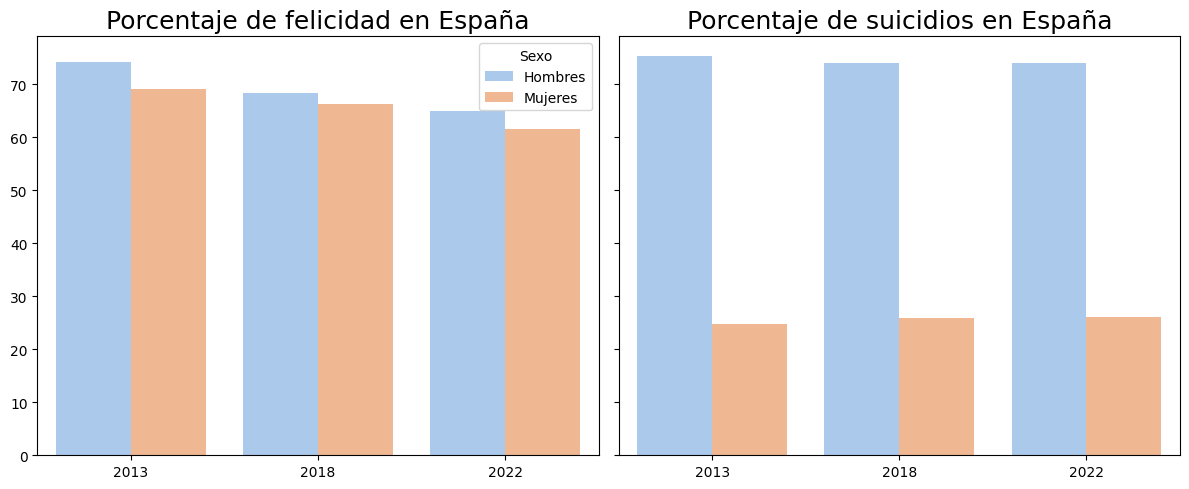

In [364]:
fig = plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharex= True, sharey= True)

sns.barplot(x='Año', y="Porcentaje de felicidad", hue='Sexo', data= data_felicidad_sexo , palette='pastel',ax=axs[0])
axs[0].set_title('Porcentaje de felicidad en España', fontsize=18)
axs[0].set_ylabel('')
axs[0].set_xlabel('')

sns.barplot(x='Año', y='Porcentaje de Suicidios', hue='Sexo', data=data_suicidios, palette='pastel', ax=axs[1])
axs[1].set_title('Porcentaje de suicidios en España', fontsize=18)
axs[1].legend().set_visible(False)
axs[1].set_xlabel('')
plt.subplots_adjust(left=0.1, right=0.9, top=1.4 , bottom=0.1)
plt.tight_layout()
plt.savefig('comparacion sui_sexo.png', dpi=300)
plt.show();

<Figure size 640x480 with 0 Axes>

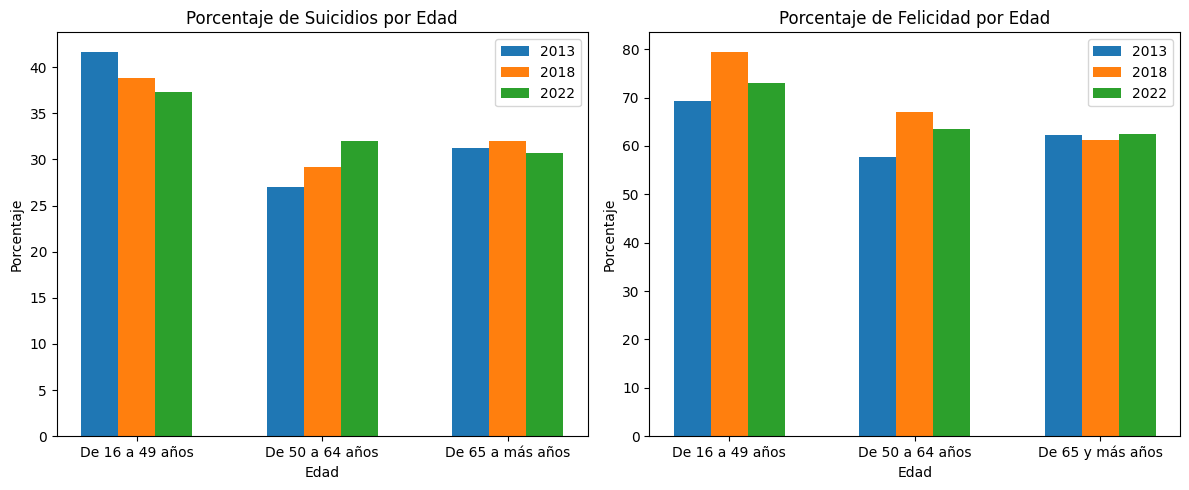

In [365]:

fig=plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de barras para porcentaje de suicidios
bar_width = 0.2
bar_positions = np.arange(len(data_suicidios_edad['Edad']))
for i, year in enumerate(data_suicidios_edad.columns[1:]):
    axs[0].bar(bar_positions + i * bar_width, data_suicidios_edad[year], width=bar_width, label=year)

axs[0].set_title('Porcentaje de Suicidios por Edad')
axs[0].set_xlabel('Edad')
axs[0].set_ylabel('Porcentaje')
axs[0].set_xticks(bar_positions + bar_width)
axs[0].set_xticklabels(data_suicidios_edad['Edad'])
axs[0].legend()

for i, year in enumerate(data_felicidad_edad.columns[1:]):
    axs[1].bar(bar_positions + i * bar_width, data_felicidad_edad[year], width=bar_width, label=year)

axs[1].set_title('Porcentaje de Felicidad por Edad')
axs[1].set_xlabel('Edad')
axs[1].set_ylabel('Porcentaje')
axs[1].set_xticks(bar_positions + bar_width)
axs[1].set_xticklabels(data_felicidad_edad['Edad'])
axs[1].legend()
plt.tight_layout()
plt.savefig('suicidios_Edad', dpi=300)

plt.show();